# Loading the dataset

In [ ]:
install.packages("fredr")
library(fredr)

install.packages("ggplot2")
library(ggplot2)

install.packages("graphics")
library(graphics)

install.packages("forecast")
library(forecast)

library(tseries)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
fredr_set_key("d12020aa815dd3c82d419e68256020c4")

In [ ]:
data1<-fredr(series_id = "MRTSSM4413USN", observation_start = as.Date("1996-01-01"), observation_end = as.Date("2019-12-01"))

In [ ]:
# display the the class of the object data1
class(data1)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
# display the structure of the object data1
str(data1)

tibble [288 × 5] (S3: tbl_df/tbl/data.frame)
 $ date          : Date[1:288], format: "1996-01-01" "1996-02-01" ...
 $ series_id     : chr [1:288] "MRTSSM4413USN" "MRTSSM4413USN" "MRTSSM4413USN" "MRTSSM4413USN" ...
 $ value         : num [1:288] 4085 4183 4480 4692 4881 ...
 $ realtime_start: Date[1:288], format: "2023-05-10" "2023-05-10" ...
 $ realtime_end  : Date[1:288], format: "2023-05-10" "2023-05-10" ...


In [ ]:
data1$date<-as.Date(data1$date, format="%m/%d/%Y")
head(data1)

date,series_id,value,realtime_start,realtime_end
<date>,<chr>,<dbl>,<date>,<date>
1996-01-01,MRTSSM4413USN,4085,2023-05-10,2023-05-10
1996-02-01,MRTSSM4413USN,4183,2023-05-10,2023-05-10
1996-03-01,MRTSSM4413USN,4480,2023-05-10,2023-05-10
1996-04-01,MRTSSM4413USN,4692,2023-05-10,2023-05-10
1996-05-01,MRTSSM4413USN,4881,2023-05-10,2023-05-10
1996-06-01,MRTSSM4413USN,4723,2023-05-10,2023-05-10


The dataframe contains 6 different columns. We will ony be conducting our study on the date and value columns; which will represent the times series.

# Statistical and graphical analysis of the time series

In [ ]:
# Mean of the values in data1
mean(data1$value)

[1] 6279.924

In [ ]:
# Variance of the values in data1
var(data1$value)

[1] 1290568

In [ ]:
# Check for NAs in the time series
any(is.na(data1))

[1] FALSE

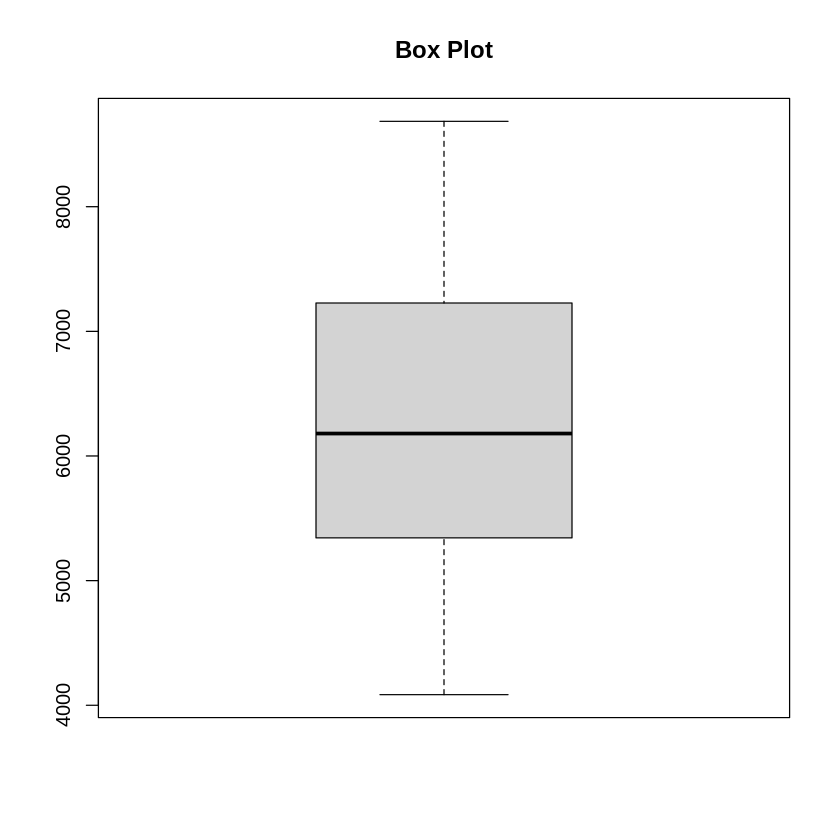

In [ ]:
# Display the boxplot
boxplot (data1$value, data = data1, main = "Box Plot")

There are no outliers in the times series dataframe.

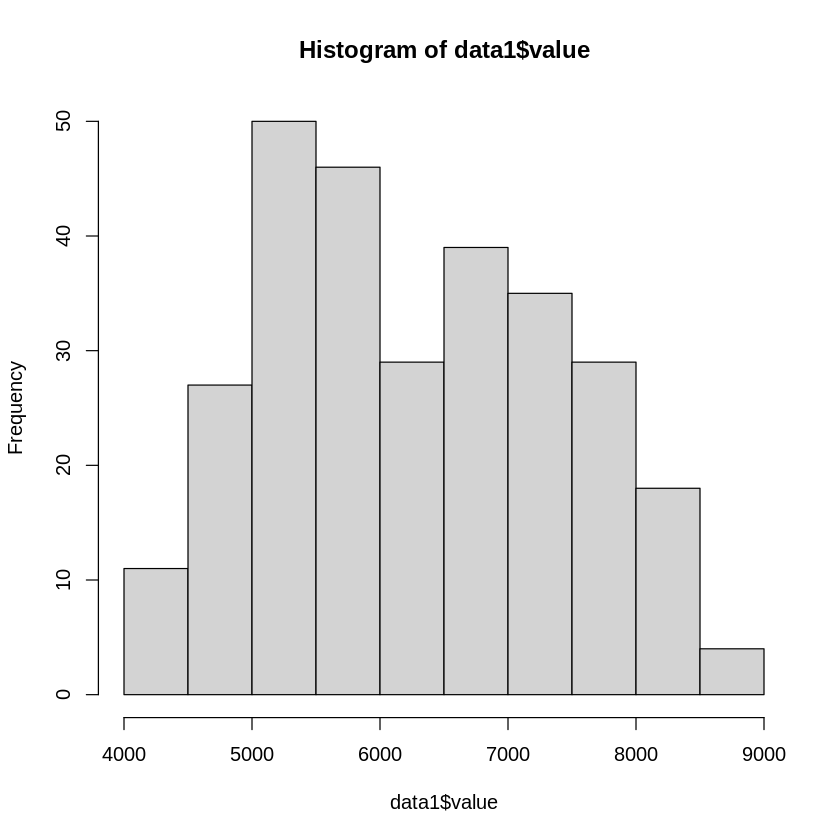

In [ ]:
# Histogram of the value column in the times seies data1
hist(data1$value)

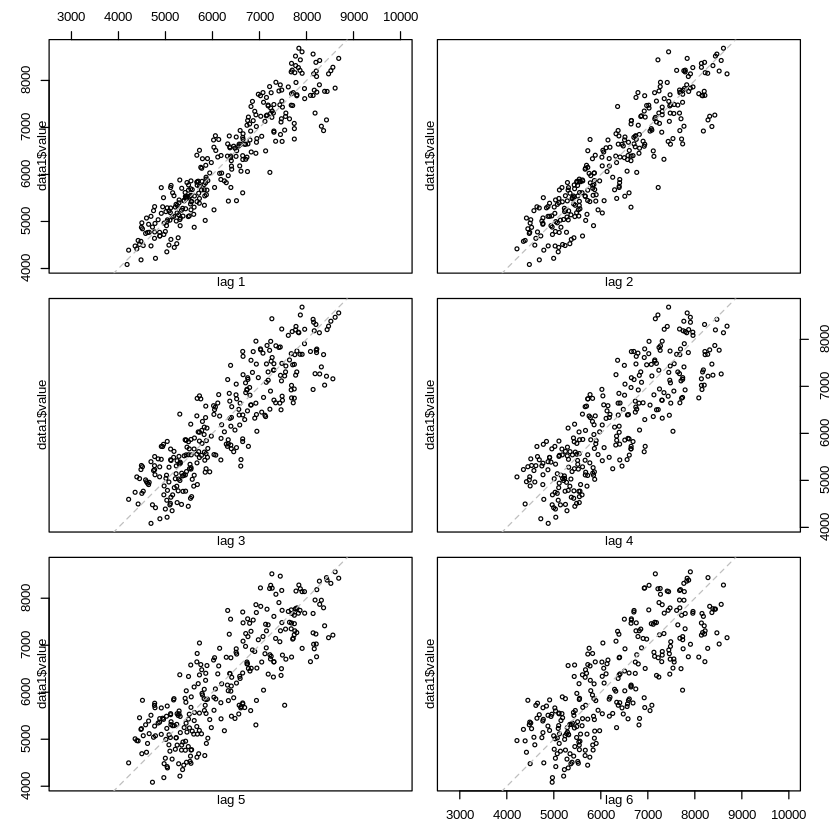

In [ ]:
# Create a lag plot with the first 6 lags
lag.plot(data1$value, 6)

There is a correlation between the values of the time series and its past values; which suggests that we can use the autoregressive model to capture this correlation.

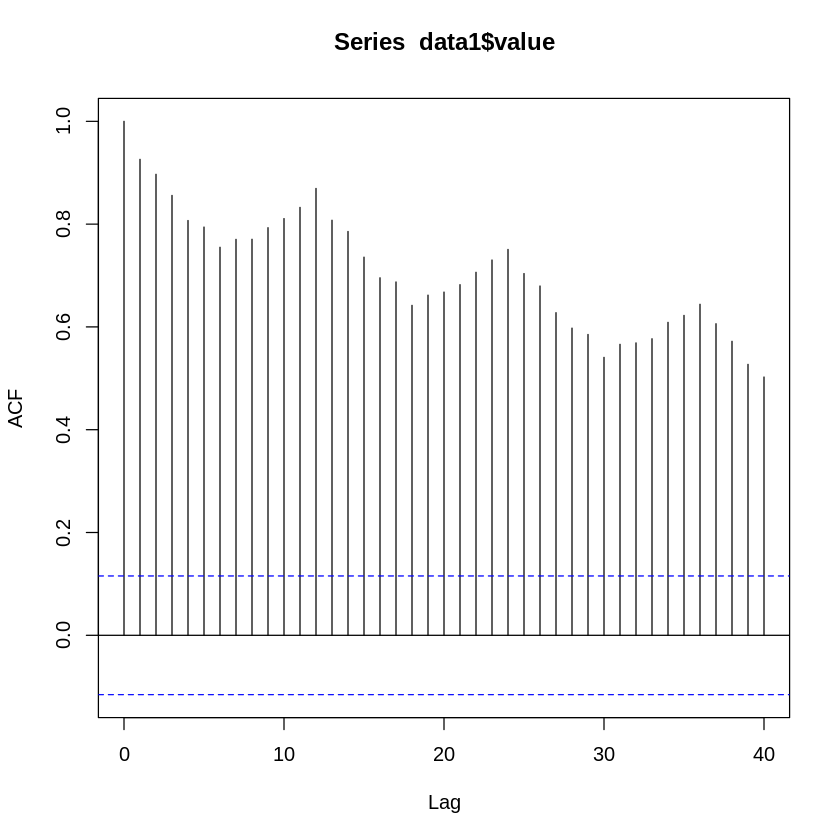

In [ ]:
# compute and display the autocorrelation (ACF) of the time series data1$value up to a maximum lag of 10
acf(data1$value, lag.max = 40)

The autocorrelation coefficient decays and has some seasonal spikes all along the lags, this shows that time series has a periodic pattern due to seasonal effects so it has a seasonal component.


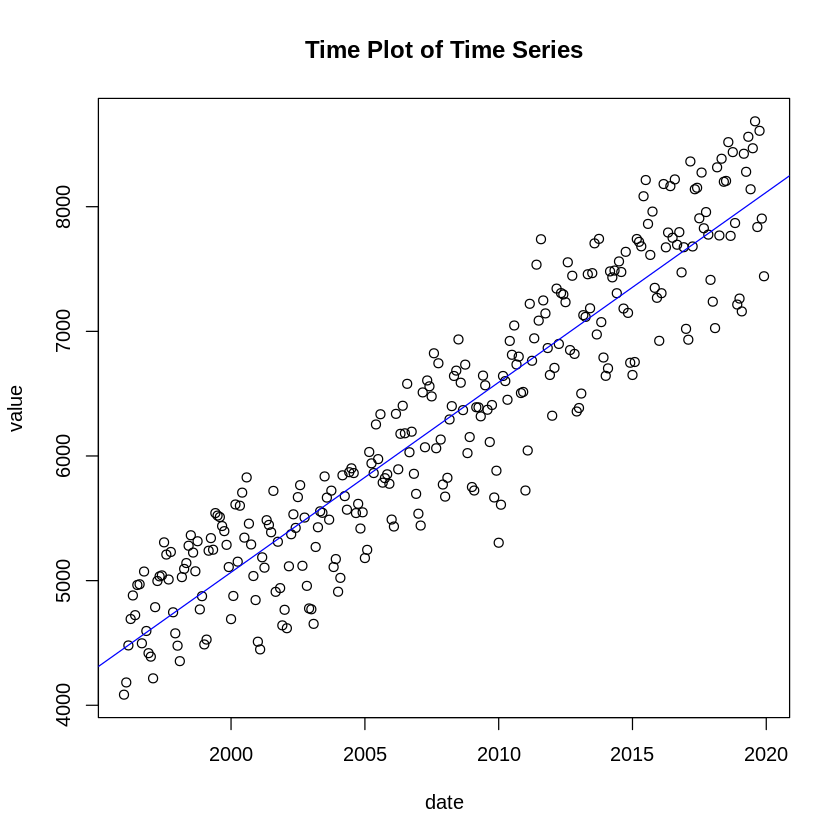

In [ ]:
# plot of the values in function of the date
plot(data1$date, data1$value, main = "Time Plot of Time Series", xlab = "date", ylab = "value")
abline(lm(data1$value~data1$date), col = "blue")

The plot shows that the times series shows a linear relationship between the values and dates; we can conclude that the time series has a trend component.

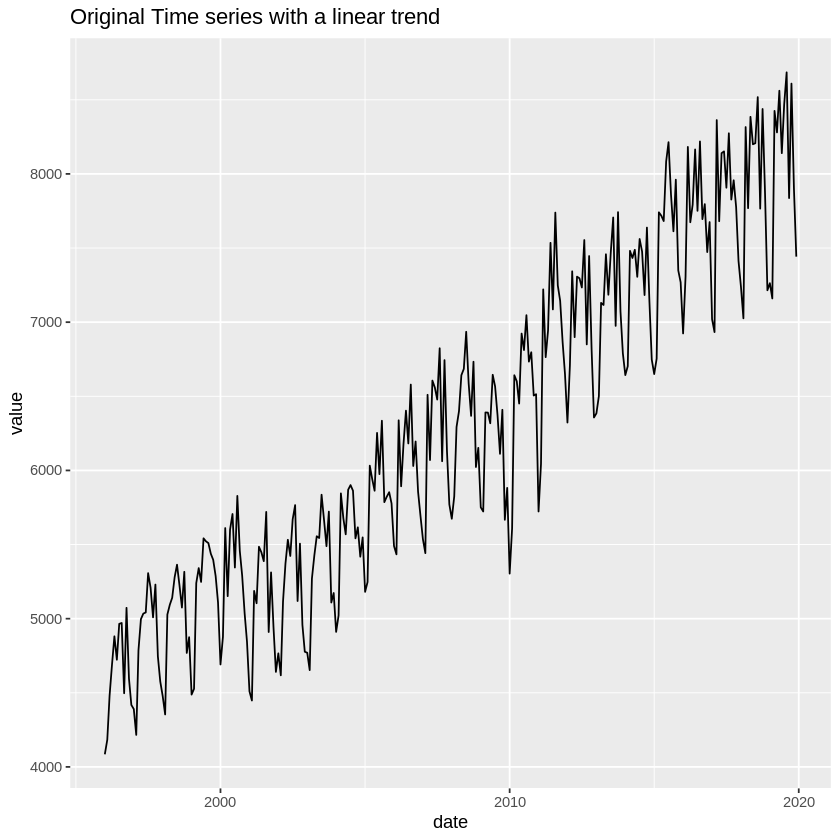

In [ ]:
# Plotting of the time series
ggplot(data = data1, aes(x = date, y = value)) +
  geom_line() +
  labs(title = "Original Time series with a linear trend")


The plot shows the linear trend of the times series.

# Adjustment of the time series

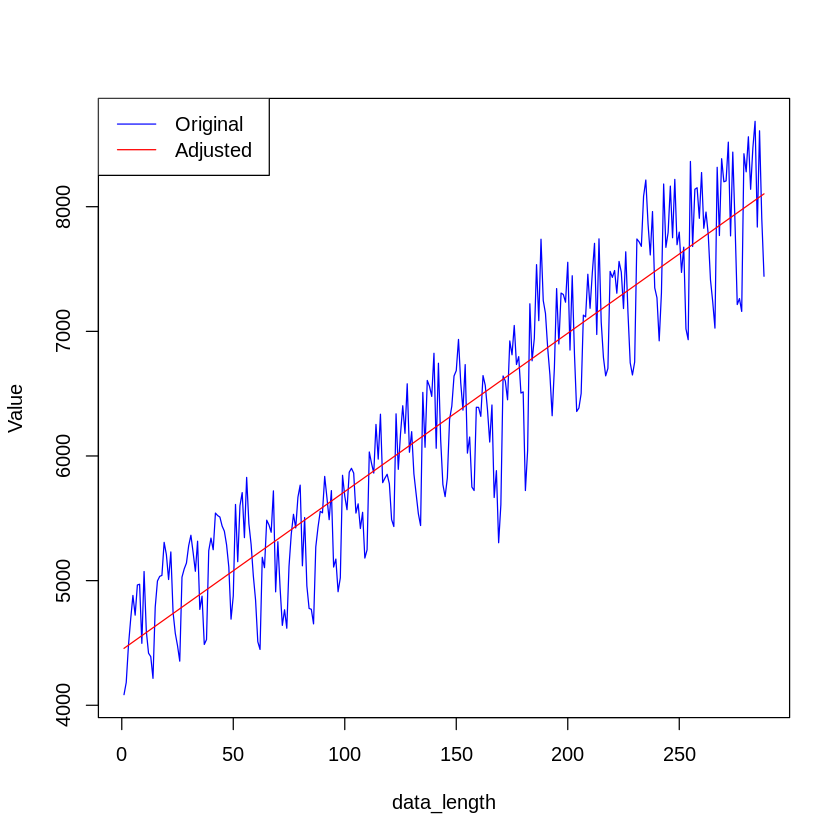

In [ ]:
# Compute the data length
data_length <- seq_along(data1$value)

# Fit a linear regression model
model <- lm(data1$value ~ data_length, data = data1)

# Compute the adjusted values
data1$adjusted_value <- predict(model, newdata = data1)

# Plot the original and adjusted values
plot(data_length, data1$value, type = 'l', col = 'blue', ylab = 'Value')
lines(data_length, data1$adjusted_value, col = 'red')
legend('topleft', legend = c('Original', 'Adjusted'), col = c('blue', 'red'), lty = 1)


We chose to work with linear adjustment for the times series because it shows a linear trend.

In [ ]:
summary(model)
AIC(model)


Call:
lm(formula = data1$value ~ data_length, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1287.21  -234.09    44.37   331.53   906.38 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4443.9640    48.9283   90.83   <2e-16 ***
data_length   12.7056     0.2935   43.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 414.1 on 286 degrees of freedom
Multiple R-squared:  0.8676,	Adjusted R-squared:  0.8671 
F-statistic:  1874 on 1 and 286 DF,  p-value: < 2.2e-16


[1] 4292.325

Based on the results of the linear regression model, we can conclude that there is a significant positive relationship between the dependent variable "value" and the independent variable "data_length". The coefficient of "data_length" is 12.7056, which means that for every unit increase in "data_length", "value" is expected to increase by 12.7056 units, all else being equal. The p-value of the coefficient is less than 0.05, indicating that it is statistically significant. The R-squared value of 0.8676 suggests that the model explains 86.76% of the variation in "value". The intercept of 4443.9640 indicates that when "data_length" is zero, "value" is expected to be 4443.9640. The residual standard error of 414.1 suggests that the model has a good fit to the data.

# Analysis and modeling of the residuals resulting from the adjustment

In [ ]:
# Fit an ARIMA model to the time series data
model <- arima(data1$value, order=c(2, 1, 1), seasonal = list(order=c(1, 1, 1), period=12))

# Extract the residuals from the fitted model
residuals <- residuals(model)

In [ ]:
# Test for stationarity using the Augmented Dickey-Fuller test
adf_test <- adf.test(residuals)

# Check the p-value
if (adf_test$p.value < 0.05) {
    print("The residuals are stationary")
} else {
    print("The residuals are not stationary")
}

Warning message in adf.test(residuals):
“p-value smaller than printed p-value”


[1] "The residuals are stationary"


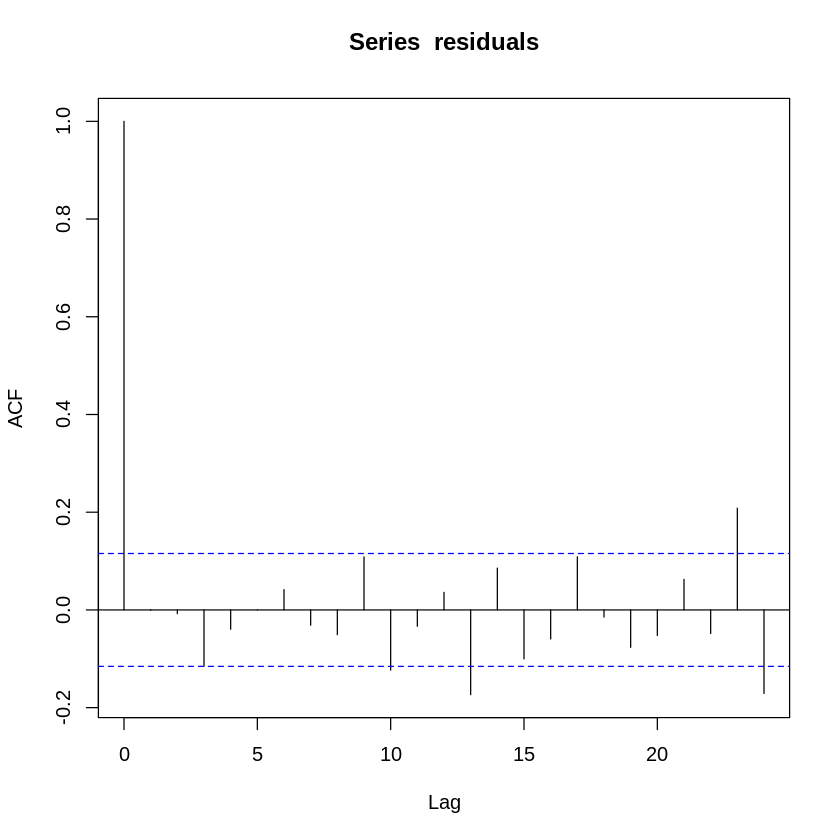

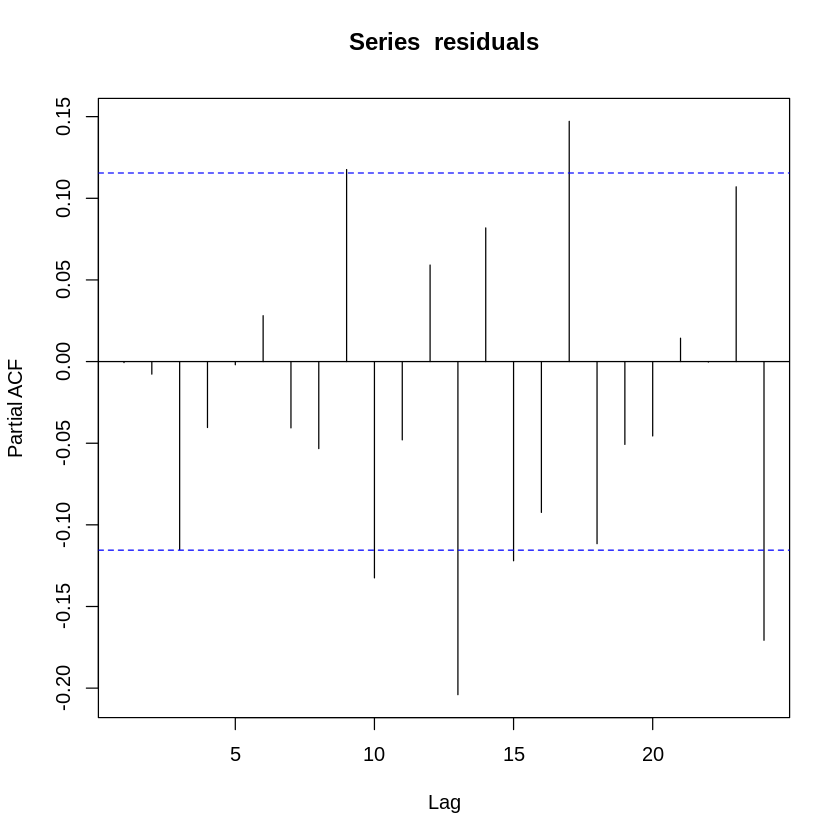

In [ ]:
# Plot the ACF and PACF of the residuals
acf(residuals)
pacf(residuals)

In [ ]:
# Estimate candidate ARIMA models using maximum likelihood estimation
model1 <- arima(residuals, order=c(1,0,0))
model2 <- arima(residuals, order=c(0,0,1))
model3 <- arima(residuals, order=c(1,0,1))

*   model1: ARIMA(1,0,0) model, which includes one autoregressive term and no moving average terms.
*   model2: ARIMA(0,0,1) model, which includes one moving average term and no autoregressive terms.
*   model3: ARIMA(1,0,1) model, which includes one autoregressive term and one moving average term.

All three models have a differencing order of 0, indicating that the data do not need to be differenced before modeling. These models will be used to select the best-fitting ARIMA model for the residual series.


### Ljung-Box test

The Ljung-Box test is a statistical test used to assess the presence of autocorrelation in the residuals of a time series model.

A p-value below 0.05 (typically chosen significance level) suggests significant autocorrelation in the residuals.

The code snippet is evaluating the ARIMA model using the Ljung-Box test. This test helps assess the adequacy of the model by checking for residual autocorrelation.

In [ ]:
# Evaluate the estimated ARIMA models using diagnostic checks
# For example:
# Ljung-Box test for model 1
ljung_box <- Box.test(model1$residuals, lag=10, type="Ljung-Box")
if (ljung_box$p.value < 0.05) {
    print("Model 1 is not a good fit")
} else {
    print("Model 1 is a good fit")
}

[1] "Model 1 is a good fit"


Series: data1$value 
ARIMA(3,1,2) with drift 

Coefficients:
          ar1      ar2     ar3     ma1     ma2    drift
      -1.9256  -1.3003  -0.201  1.7959  0.9192  12.1531
s.e.   0.0709   0.1201   0.070  0.0360  0.0300  16.7367

sigma^2 = 116436:  log likelihood = -2079.44
AIC=4172.87   AICc=4173.27   BIC=4198.49

Training set error measures:
                       ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.007028071 337.0549 266.1866 -0.1508743 4.288063 0.8317879
                    ACF1
Training set 0.005815026

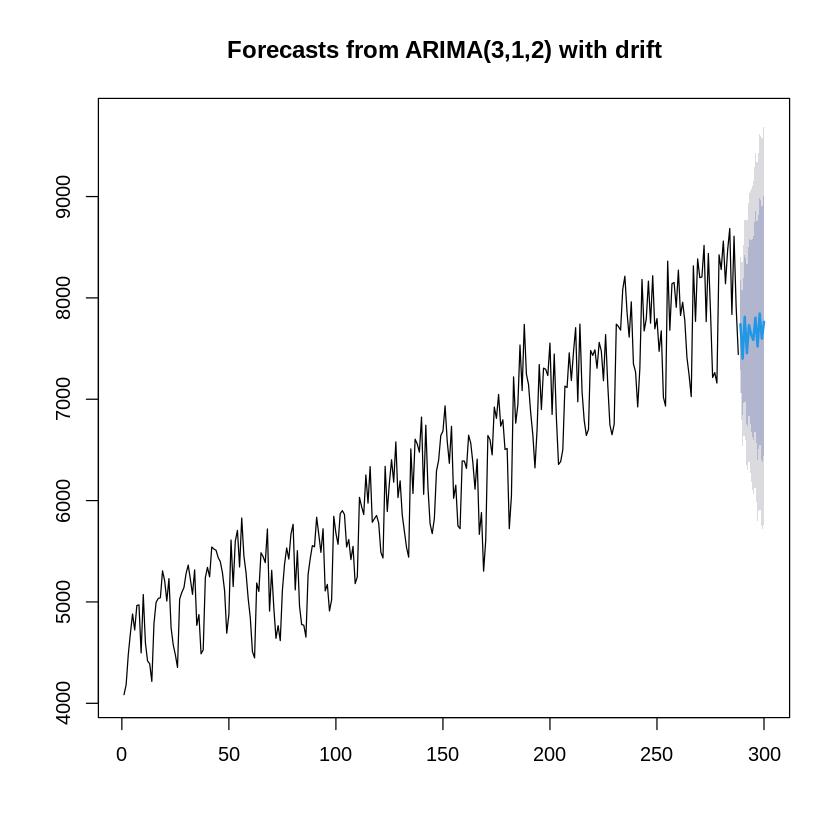

In [ ]:
library(forecast)

# Fit the ARIMA model to the time series data
model <- auto.arima(data1$value, seasonal=TRUE)

# Print the model summary
summary(model)

# Make forecasts using the fitted model
forecast <- forecast(model, h=12)

# Plot the forecasts
plot(forecast)

The model fit and evaluation metrics, such as the log likelihood and information criteria (AIC, AICc, BIC), suggest that the model adequately captures the patterns in the data.

The training set error measures, including RMSE, MAE, MPE, MAPE, MASE, and ACF1, provide insights into the performance of the model on the training data. These metrics can be used to assess the accuracy and predictive power of the model.

Overall, the ARIMA(3,1,2) model with drift provides a reasonable fit to the data and could be used for forecasting.